In [1]:
# importing necessary libraries.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [4]:
# Reading Data

In [5]:
data=pd.read_csv("student_scores - student_scores.csv")

In [6]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
# Visualizing the data.

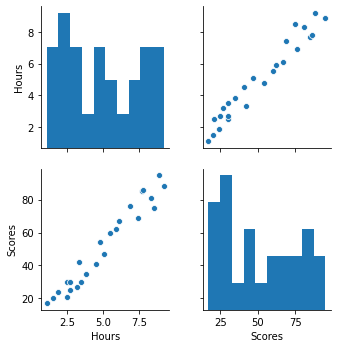

In [10]:
sns.pairplot(data)

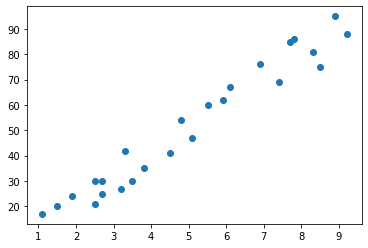

In [11]:
x = data["Hours"]
y = data["Scores"]
plt.scatter(x,y)
plt.show()

In [12]:
# Splitting the dataset into independent and dependent variables.

In [13]:
X=data.drop(labels=["Scores"],axis=1)
Y=data["Scores"]
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [14]:
Y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(20, 1) (5, 1) (20,) (5,)


In [16]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [17]:
Y_predict=model.predict(X_test)

In [18]:
Y_predict

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [19]:
Y_predict,Y_test

(array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328]),
 5     20
 2     27
 19    69
 16    30
 11    62
 Name: Scores, dtype: int64)

In [20]:
df=pd.DataFrame(data=[Y_predict,Y_test])

In [21]:
df.T             # 0 predicted value and 1 true value.

,0,1
0,16.884145,20.0
1,33.732261,27.0
2,75.357018,69.0
3,26.794801,30.0
4,60.491033,62.0


In [22]:
score=r2_score(Y_test,Y_predict)
mae=mean_absolute_error(Y_test,Y_predict)
mse=mean_squared_error(Y_test,Y_predict)
print('r2_score: ',score)
print('mean_absolute_error: ',mae)
print('mean_squared_error: ',mse)

r2_score:  0.9454906892105355
mean_absolute_error:  4.183859899002975
mean_squared_error:  21.598769307217406


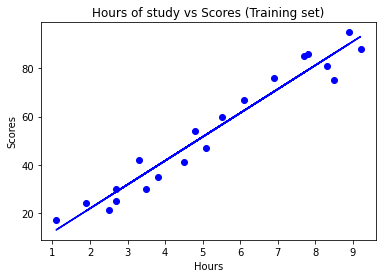

In [23]:
plt.scatter(X_train, Y_train, color = "blue")
plt.plot(X_train, model.predict(X_train), color = "blue")
plt.title("Hours of study vs Scores (Training set)")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

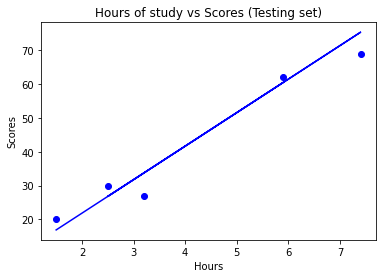

In [24]:
plt.scatter(X_test, Y_test, color = "blue")
plt.plot(X_test, model.predict(X_test), color = "blue")
plt.title("Hours of study vs Scores (Testing set)")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [25]:
model.predict(np.array([9.25]).reshape(1, 1))

array([93.69173249])

In [26]:
# Hence if a student studies for 9.25 hours per day then he should score 93.69 